# Using KNN Algorithm to predict if a person will have diabetes or not


#### A supervised machine learning algorithm (as opposed to an unsupervised machine learning algorithm) is one that relies on labeled input data to learn a function that produces an appropriate output when given new unlabeled data.
#### Supervised machine learning algorithms are used to solve classification or regression problems.
#### classification - 0/1

### importing libraries

In [3]:
import numpy as np
import pandas as pd
import copy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

### loading the dataset

In [4]:
data = pd.read_csv('diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Replace columns like [Gluscose,BloodPressure,SkinThickness,BMI,Insulin] with Zero as values with mean of respective column

In [6]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
# for col in zero_not_accepted:
#     for i in data[col]:
#         if i==0:
#             colSum = sum(data[col])
#             meanCol=colSum/len(data[col])
#             data[col]=meanCol

for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)


### extracting independent variables

In [7]:
X = data.iloc[:,0:8]
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    155.0  33.6   
1              1     85.0           66.0           29.0    155.0  26.6   
2              8    183.0           64.0           29.0    155.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    155.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    155.0  30.1   
767            1     93.0           70.0           31.0    155.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


### extracting dependent variable

In [8]:
y = data.iloc[:,8]
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Explorning data to know relation before processing

<Axes: >

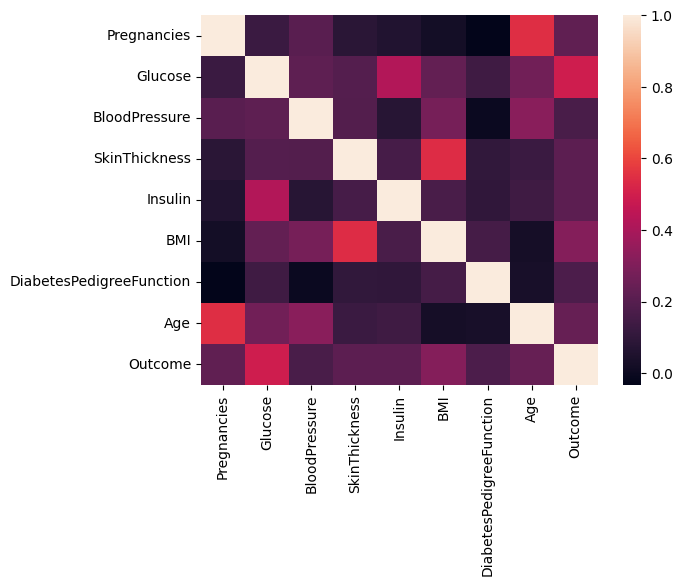

In [9]:
sns.heatmap(data.corr())

### splitting dataset into training and testing set

In [10]:
y = np.array(data['Outcome'])
Data=copy.deepcopy(data)
del Data['Outcome']
X = np.array(Data)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print (" Training Data Set Dimensions=", X_train.shape, "Training True Class labels dimensions", y_train.shape)
print (" Test Data Set Dimensions=", X_test.shape, "Test True Class labels dimensions", y_test.shape)

 Training Data Set Dimensions= (614, 8) Training True Class labels dimensions (614,)
 Test Data Set Dimensions= (154, 8) Test True Class labels dimensions (154,)


In [19]:
def Euclidian_Distance(pred, actual):
    dist = 0

    for i in range(len(actual)):
        dist += (actual[i] - pred[i])**2

    ans = math.sqrt(dist)
    return ans

In [27]:
def getKNearest(info, k):
    # Sort the info list based on the distance (first element of each tuple)
    info.sort(key=lambda x: x[0])
    # Return the first k elements
    return info[:k]

In [28]:
def getClasses(k_nearests):
    # Extract the classes (second element of each tuple) from k_nearests
    return [cls for dist, cls in k_nearests]

In [29]:
def getMaxClass(classs):
    # Count occurrences of each class
    class_count = {cls: classs.count(cls) for cls in set(classs)}
    # Find the class with the maximum count
    max_class = max(class_count, key=class_count.get)
    return max_class


In [30]:
def KNN(X_train, X_test, y_train, k):
    predictions = []
    # Iterate over the entire test set
    for test_instance in X_test:
        info = []
        # Iterate over the entire training set
        for train_instance, label in zip(X_train, y_train):
            # Calculate the euclidean Distance of both the instances
            distance = Euclidian_Distance(test_instance, train_instance)
            # Add the eucl. dist and the label to the info list
            info.append((distance, label))
        # Find the k nearest info labels
        k_nearests = getKNearest(info, k)
        # Get the classes from the info labels
        classs = getClasses(k_nearests)
        # The predicted class will be the one with the highest score
        pred = getMaxClass(classs)
        # Add to the predictions list
        predictions.append(pred)
    return predictions

In [31]:
def Accuracy(prediction, Ytest):
    c = 0
    print("Total elements: ", len(prediction))
    for i in range(len(prediction)):
        if prediction[i] == Ytest[i]:
            c += 1

    print("Correct predictions: ", c)
    percentage = c / len(prediction) * 100
    return percentage


In [32]:
# Run your model by passing on different values of k and print the predicted, actual values, and accuracy
k = 4
# predictions
pred = KNN(X_train, X_test, y_train, k)
# test set to list
Ytest = list(y_test)
# print the predictions, actual values, and accuracy
print("Test Set: ")
print(Ytest)
print("Predictions: ")
print(pred)
print("Accuracy of k =", k, ":", Accuracy(pred, Ytest))

Test Set: 
[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]
Predictions: 
[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total elements:  154
Correct predictions:  118
Ac